# 21022008_NguyenHuuTho

In [3]:
#from google.colab 
#import drive drive.mount('/content/drive')

In [4]:
#pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode (connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [3]:
data = pd.read_csv('AllElectronics.csv')
data

,ID,age,income,student,credit_rating,class_buys_computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [5]:
X = data.iloc[:,:-1] # Thi 50%: Sửa -1
X

,ID,age,income,student,credit_rating
0,1,youth,high,no,fair
1,2,youth,high,no,excellent
2,3,middle_aged,high,no,fair
3,4,senior,medium,no,fair
4,5,senior,low,yes,fair
5,6,senior,low,yes,excellent
6,7,middle_aged,low,yes,excellent
7,8,youth,medium,no,fair
8,9,youth,low,yes,fair
9,10,senior,medium,yes,fair


In [6]:
y = data.iloc[:,5] # Thi 50%: Lấy cột thứ 5 trong bản, cột thứ 5 là cột quyết định
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: class_buys_computer, dtype: object

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [7]:
from sklearn.preprocessing import LabelEncoder 
labelencoder_X = LabelEncoder()
X = X.apply(LabelEncoder().fit_transform)
X

,ID,age,income,student,credit_rating
0,0,2,0,0,1
1,1,2,0,0,0
2,2,0,0,0,1
3,3,1,2,0,1
4,4,1,1,1,1
5,5,1,1,1,0
6,6,0,1,1,0
7,7,2,2,0,1
8,8,2,1,1,1
9,9,1,2,1,1


In [8]:
X.columns

Index(['ID', 'age', 'income ', 'student', 'credit_rating'], dtype='object')

In [9]:
#X.classes_ # Coi các lớp

AttributeError: 'DataFrame' object has no attribute 'classes_'

In [10]:
X.shape # Coi bao nhiêu hàng và cột (Hàng, cột)

(14, 5)

In [11]:
X.info() # Coi thông tin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             14 non-null     int64
 1   age            14 non-null     int32
 2   income         14 non-null     int32
 3   student        14 non-null     int32
 4   credit_rating  14 non-null     int32
dtypes: int32(4), int64(1)
memory usage: 464.0 bytes


In [14]:
X.describe()

,ID,age,income,student,credit_rating
count,14.0000,14.000000,14.000000,14.000000,14.000000
mean,6.5000,1.071429,1.142857,0.500000,0.571429
std,4.1833,0.828742,0.864438,0.518875,0.513553
min,0.0000,0.000000,0.000000,0.000000,0.000000
25%,3.2500,0.250000,0.250000,0.000000,0.000000
50%,6.5000,1.000000,1.000000,0.500000,1.000000
75%,9.7500,2.000000,2.000000,1.000000,1.000000
max,13.0000,2.000000,2.000000,1.000000,1.000000


In [15]:
#genre_mappings = {index: label for index, label in enumerate(X.classes_)}
#genre_mappings

In [16]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
regressor.fit(X.iloc[:,1:5],y) # hàm .fit là Huấn luyện mô hình (train module)
# X_in = np.array([2,0,0,0])
X_in = np.array([1,0,0,0])
y_pred = regressor.predict([X_in]) # .predict : Hàm dự đoán . Đưa ra kết quả kiểu thử
y_pred # Trả về nhánh bất kỳ

# Đánh giá độ chính xác 

# Nhận diện chử số viết tay: BƯớc kiểm thử - 

# BTVN: Sử dụng dữ liệu dòng 5 (bất kỳ), trong bảng để trả về không mua máy tính

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



array(['no'], dtype=object)

In [7]:
#pip install pydotplus sklearn

In [17]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png ('Tree_Buy_Computer.png')

# Conda: conda install graphviz
# HomeWork : Lưu tấm hình cây với tên, Show ảnh

True

# Bài tập
- Chọn dữ liệu để xuất hiện qd: Yes
- Lưu hình cây quyết (qd) với tên: Cay_Quyet_Dinh_.csv
- Hiểm thị hình ảnh cây (qd) trên cửa sổ Colab
- Thay đổi dữ liệu cỉa file csv

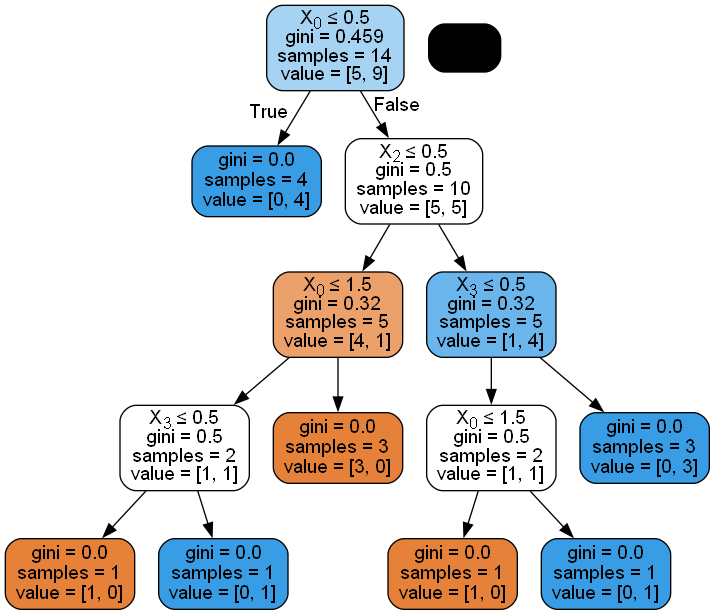

In [18]:
# Lưu tấm hình cây với tên, Show ảnh - Xong
from IPython.display import Image
Image('Tree_Buy_Computer.png')